# Human Resource

Analyzing of HR dataset and PerformanceRating possibility using the different models

In [ ]:
HR project process are as follows
1.importing packs
2.importing data
3.data analysis
4.EDA Process
5.modeling
6.prediction
7.cross validation
8.saving file

Importing packets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


importing dataset

In [2]:
data=pd.read_csv('hr.csv')
data

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [3]:
data.columns  #to find the number of columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
data.isnull().sum() # to find the null value in columns

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
data.dropna(axis=0, inplace=True) # dropping rows if null value present in dataset
data

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [6]:
data.info() # it provides the data type and Null value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Data Visualization

No     1233
Yes     237
Name: Attrition, dtype: int64


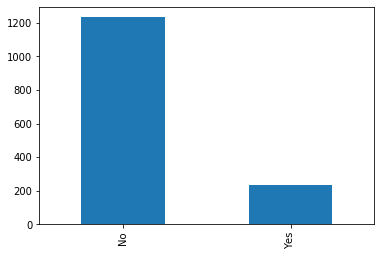

In [7]:
#Analysing attrition of dataset
print(data['Attrition'].value_counts())
data['Attrition'].value_counts().plot.bar()

It has a counts of 1233 as No and 237 as yes 

Plot above gives us the attrition of dataset

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


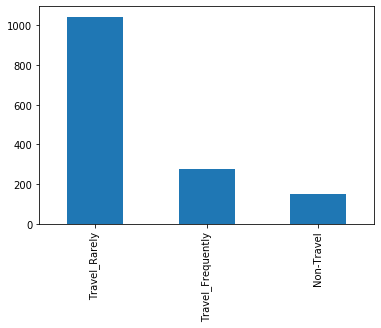

In [8]:
print(data['BusinessTravel'].value_counts())
data['BusinessTravel'].value_counts().plot.bar()

BusinessTravel defines the business travelling there are Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150 plot as shown above

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


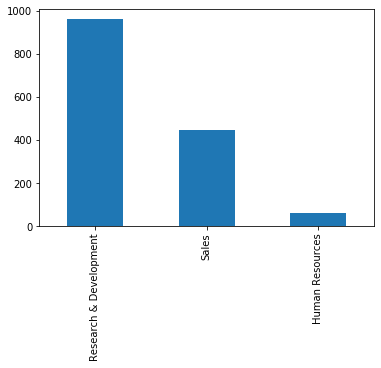

In [9]:
print(data['Department'].value_counts())
data['Department'].value_counts().plot.bar()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


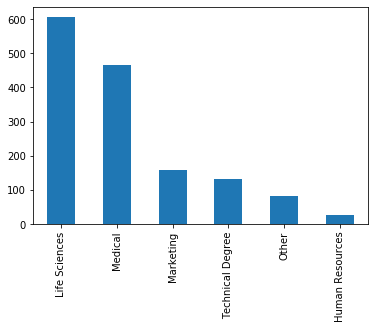

In [10]:
print(data['EducationField'].value_counts())
data['EducationField'].value_counts().plot.bar()

Male      882
Female    588
Name: Gender, dtype: int64


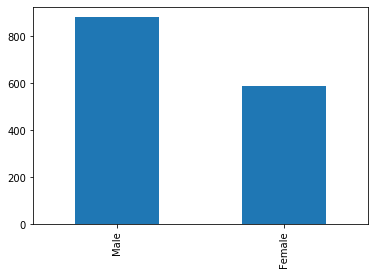

In [11]:
print(data['Gender'].value_counts())
data['Gender'].value_counts().plot.bar()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


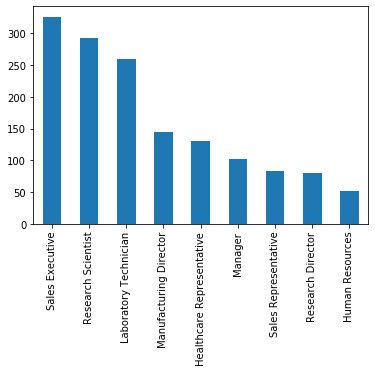

In [12]:
print(data['JobRole'].value_counts())
data['JobRole'].value_counts().plot.bar()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


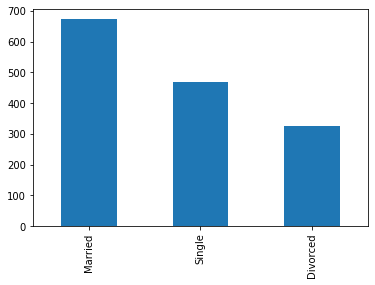

In [13]:
print(data['MaritalStatus'].value_counts())
data['MaritalStatus'].value_counts().plot.bar()

3    1244
4     226
Name: PerformanceRating, dtype: int64


Text(0, 0.5, 'employers')

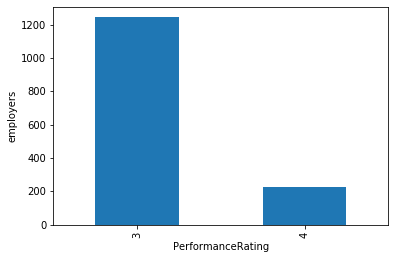

In [14]:
print(data['PerformanceRating'].value_counts())
data['PerformanceRating'].value_counts().plot.bar()
plt.xlabel('PerformanceRating')
plt.ylabel('employers')

# Data cleaning and Preprocessing

since 'Age','EmployeeCount','EmployeeNumber','Over18','StandardHours' these columns doesn't help us in our modeling I'm dropping it 

In [15]:
remove=['Age','EmployeeCount','EmployeeNumber','Over18','StandardHours'] #with help of drop we removed the following columns
data.drop(remove, axis=1, inplace=True)

In [16]:
data

Attrition     BusinessTravel  DailyRate              Department  \
0          Yes      Travel_Rarely       1102                   Sales   
1           No  Travel_Frequently        279  Research & Development   
2          Yes      Travel_Rarely       1373  Research & Development   
3           No  Travel_Frequently       1392  Research & Development   
4           No      Travel_Rarely        591  Research & Development   
...        ...                ...        ...                     ...   
1465        No  Travel_Frequently        884  Research & Development   
1466        No      Travel_Rarely        613  Research & Development   
1467        No      Travel_Rarely        155  Research & Development   
1468        No  Travel_Frequently       1023                   Sales   
1469        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  HourlyRate  ...  PerformanceRating  RelationshipSatisfaction  \
0     Female          94  ...                  3                         1   
1       Male          61  ...                  4                         4   
2       Male          92  ...                  3                         2   
3     Female          56  ...                  3                         3   
4       Male          40  ...                  3                         4   
...      ...         ...  ...                ...                       ...   
1465    Male          41  ...                  3                         3   
1466    Male          42  ...                  3                         1   
1467    Male          87  ...                  4                         2   
1468    Male          63  ...                  3                         4   
1469    Male          82  ...                  3                         1   

     StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  \
0                   0                  8                     0   
1                   1                 10                     3   
2                   0                  7                     3   
3                   0                  8                     3   
4                   1                  6                     3   
...               ...                ...                   ...   
1465                1                 17                     3   
1466                1                  9                     5   
1467                1                  6                     0   
1468                0                 17                     3   
1469                0                  6                     3   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                   1               6                   4   
1                   3              10                   7   
2                   3               0                   0   
3                   3               8                   7   
4                   3               2                   2   
...               ...             ...                 ...   
1465                3               5                   2 

In [17]:
#By using labelencoder ,converts into numerical value
df=data.apply(LabelEncoder().fit_transform)
df

Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0             1               2        624           2                 0   
1             0               1        113           1                 7   
2             1               2        805           1                 1   
3             0               1        820           1                 2   
4             0               2        312           1                 1   
...         ...             ...        ...         ...               ...   
1465          0               1        494           1                22   
1466          0               2        327           1                 5   
1467          0               2         39           1                 3   
1468          0               1        579           2                 1   
1469          0               2        336           1                 7   

      Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0             1               1                        1       0          64   
1             0               1                        2       1          31   
2             1               4                        3       1          62   
3             3               1                        3       0          26   
4             0               3                        0       1          10   
...         ...             ...                      ...     ...         ...   
1465          1               3                        2       1          11   
1466          0               3                        3       1          12   
1467          2               1                        1       1          57   
1468          2               3                        3       1          33   
1469          2               3                        1       1          52   

      ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0     ...                  0                         0                 0   
1     ...                  1                         3                 1   
2     ...                  0                         1                 0   
3     ...                  0                         2                 0   
4     ...                  0                         3                 1   
...   ...                ...                       ...               ...   
1465  ...                  0                         2                 1   
1466  ...                  0                         0                 1   
1467  ...                  1                         1                 1   
1468  ...                  0                         3                 0   
1469  ...                  0                         0                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                0   
1                    10                      3                2   
2                     7                      3                2   
3                     8                      3                2   
4                     6                      3                2   
...                 ...                    ...              ...   
1465                 17                      3                2   
1466                  9                      5                2   
1467                  6                      0                2   
1468                 17                      3                1   
1469                  6                      3                3   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   


In [18]:
#zscore is used to find the outliners
z_score=abs(zscore(df))
print(df.shape)
data_final=df.loc[(z_score).all(axis=1)]    
print(data_final.shape)  

(1470, 30)
(1470, 30)


Since there are no outliners we are getting the same shape of data

In [19]:
data_final.skew()

Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                   0.000930
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.060816
MonthlyRate                 0.012315
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.112899
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.676650
Y

In [20]:
for col in data_final.columns:
    if data_final.skew().loc[col]>0.55:
        data_final[col]=np.log1p(data_final[col])

In [21]:
data_final.skew()

Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                   0.000930
Department                  0.172231
DistanceFromHome           -0.246004
Education                  -0.289681
EducationField             -0.054786
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.219763
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.060816
MonthlyRate                 0.012315
NumCompaniesWorked          0.092896
OverTime                    0.964489
PercentSalaryHike          -0.281716
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears          -0.622798
TrainingTimesLastYear      -1.075852
WorkLifeBalance            -0.552480
YearsAtCompany             -0.216883
Y

Electronic design automation (EDA)

In [40]:
# to get descriptive statistics for all columns of dataset

data_final.describe()

Attrition  BusinessTravel    DailyRate   Department  \
count  1470.000000     1470.000000  1470.000000  1470.000000   
mean      0.111752        1.607483   443.074830     1.260544   
std       0.254983        0.665455   253.513199     0.527792   
min       0.000000        0.000000     0.000000     0.000000   
25%       0.000000        1.000000   225.000000     1.000000   
50%       0.000000        2.000000   447.000000     1.000000   
75%       0.000000        2.000000   660.000000     2.000000   
max       0.693147        2.000000   885.000000     2.000000   

       DistanceFromHome    Education  EducationField  EnvironmentSatisfaction  \
count       1470.000000  1470.000000     1470.000000              1470.000000   
mean           1.743130     1.912925        1.092825                 1.721769   
std            1.060198     1.024165        0.416952                 1.093082   
min            0.000000     0.000000        0.000000                 0.000000   
25%            0.693147     1.000000        0.693147                 1.000000   
50%            1.945910     2.000000        1.098612                 2.000000   
75%            2.639057     3.000000        1.386294                 3.000000   
max            3.367296     4.000000        1.791759                 3.000000   

            Gender   HourlyRate  ...  PerformanceRating  \
count  1470.000000  1470.000000  ...        1470.000000   
mean      0.600000    35.891156  ...           0.106565   
std       0.490065    20.329428  ...           0.250104   
min       0.000000     0.000000  ...           0.000000   
25%       0.000000    18.000000  ...           0.000000   
50%       1.000000    36.000000  ...           0.000000   
75%       1.000000    53.750000  ...           0.000000   
max       1.000000    70.000000  ...           0.693147   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1470.000000       1470.000000        1470.000000   
mean                   1.712245          0.479273           2.294212   
std                    1.081209          0.453966           0.698564   
min                    0.000000          0.000000           0.000000   
25%                    1.000000          0.000000           1.945910   
50%                    2.000000          0.693147           2.397895   
75%                    3.000000          0.693147           2.772589   
max                    3.000000          1.386294           3.688879   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                1.271081         1.761224        1.811230   
std                 0.377816         0.706476        0.755738   
min                 0.000000         0.000000        0.000000   
25%                 1.098612         1.000000        1.386294   
50%                 1.386294         2.000000        1.791759   
75%                 1.386294         2.000000        2.302585   
max                 1.945910         3.000000        3.610918   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             1.378737                 0.788100              1.350077  
std              0.794116                 0.809960              0.806270  
min              0.000000                 0.000000              0.000000  
25%              1.098612                 0.000000              1.098612  
50%              1.386294                 0.693147              1.386294  
75%              2.079442                 1.386294              2.079442  
max              2.944439                 2.772589              2.890372  

[8 rows x 30 columns]

In [22]:
#Finding the co-relation with each-other
data_final.corr()

Attrition  BusinessTravel  DailyRate  Department  \
Attrition                  1.000000        0.000074  -0.056605    0.063991   
BusinessTravel             0.000074        1.000000  -0.004103   -0.009044   
DailyRate                 -0.056605       -0.004103   1.000000    0.007796   
Department                 0.063991       -0.009044   0.007796    1.000000   
DistanceFromHome           0.076393       -0.004421  -0.003171    0.031445   
Education                 -0.031373        0.000757  -0.016550    0.007996   
EducationField             0.015616        0.027543   0.038372    0.080573   
EnvironmentSatisfaction   -0.103369        0.004174   0.018462   -0.019395   
Gender                     0.029453       -0.032981  -0.011194   -0.041583   
HourlyRate                -0.006846        0.026528   0.022916   -0.004144   
JobInvolvement            -0.130016        0.039062   0.046072   -0.024586   
JobLevel                  -0.192880        0.003764   0.002481    0.168024   
JobRole                    0.067151        0.002724  -0.009127    0.662431   
JobSatisfaction           -0.103481       -0.033962   0.030712    0.021001   
MaritalStatus              0.162070        0.024001  -0.069527    0.056073   
MonthlyIncome             -0.196165        0.025095   0.015784    0.157526   
MonthlyRate                0.015273       -0.014115  -0.032051    0.023898   
NumCompaniesWorked         0.037844        0.026718   0.036776   -0.030363   
OverTime                   0.246118        0.016543   0.008902    0.007481   
PercentSalaryHike         -0.027193       -0.035107   0.018454    0.000038   
PerformanceRating          0.002889       -0.026341   0.000633   -0.024604   
RelationshipSatisfaction  -0.045872       -0.035986   0.008530   -0.022414   
StockOptionLevel          -0.166288       -0.015829   0.040489   -0.012132   
TotalWorkingYears         -0.231023        0.038554   0.022488   -0.004252   
TrainingTimesLastYear     -0.064085        0.018629   0.004379    0.043479   
WorkLifeBalance           -0.063939       -0.011256  -0.037791    0.026383   
YearsAtCompany            -0.198952       -0.010078  -0.009037    0.018868   
YearsInCurrentRole        -0.187618       -0.023235   0.011100    0.047113   
YearsSinceLastPromotion   -0.048475       -0.030856  -0.037370    0.029203   
YearsWithCurrManager      -0.190667       -0.016147   0.004942    0.021202   

                          DistanceFromHome  Education  EducationField  \
Attrition                         0.076393  -0.031373        0.015616   
BusinessTravel                   -0.004421   0.000757        0.027543   
DailyRate                        -0.003171  -0.016550        0.038372   
Department                        0.031445   0.007996        0.080573   
DistanceFromHome                  1.000000   0.016378        0.019769   
Education                         0.016378   1.000000       -0.040902   
EducationField                    0.019769  -0.040902        1.000000   
EnvironmentSatisfaction          -0.008126  -0.027128        0.038699   
Gender                            0.008881  -0.016547       -0.009393   
HourlyRate                        0.013341   0.016775       -0.019688   
JobInvolvement                    0.035378   0.042438       -0.002289   
JobLevel                          0.015237   0.115726       -0.032836   
JobRole                           0.012243   0.004236        0.050368   
JobSatisfaction                  -0.011438  -0.011296       -0.033029   
MaritalStatus                    -0.023598   0.004053        0.017706   
MonthlyIncome                    -0.000133   0.124561       -0.030619   
MonthlyRate                       0.043196  -0.025694       -0.027485   
NumCompaniesWorked               -0.003678   0.134492       -0.018499   
OverTime                          0.039437  -0.020322        0.004490   
PercentSalaryHike                 0.026250   0.002097       -0.000339   
PerformanceRating                 0.007438  -0.024539       -0.001816   
R

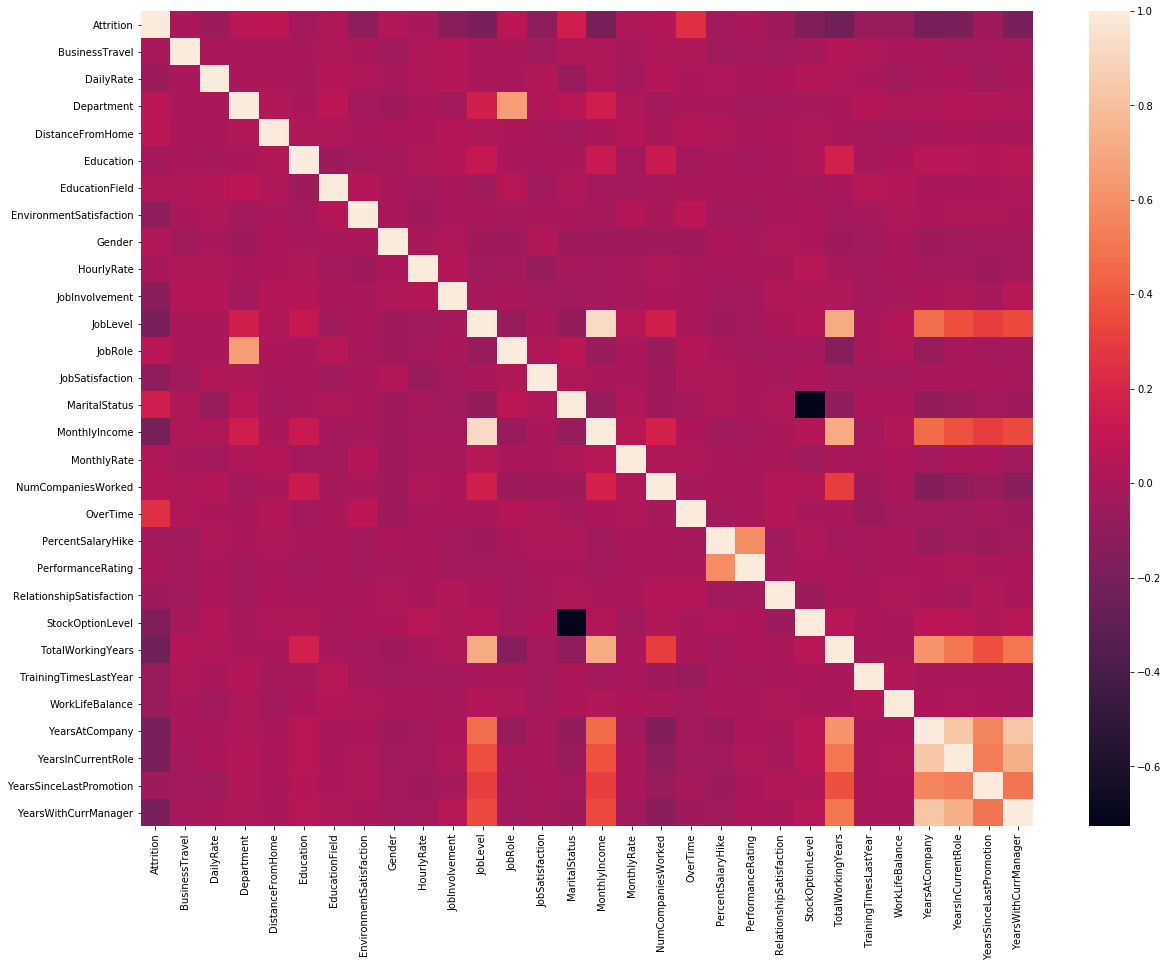

In [23]:
# Heatmap of co-related data

plt.subplots(figsize=(20,15))
sb.heatmap(data_final.corr())

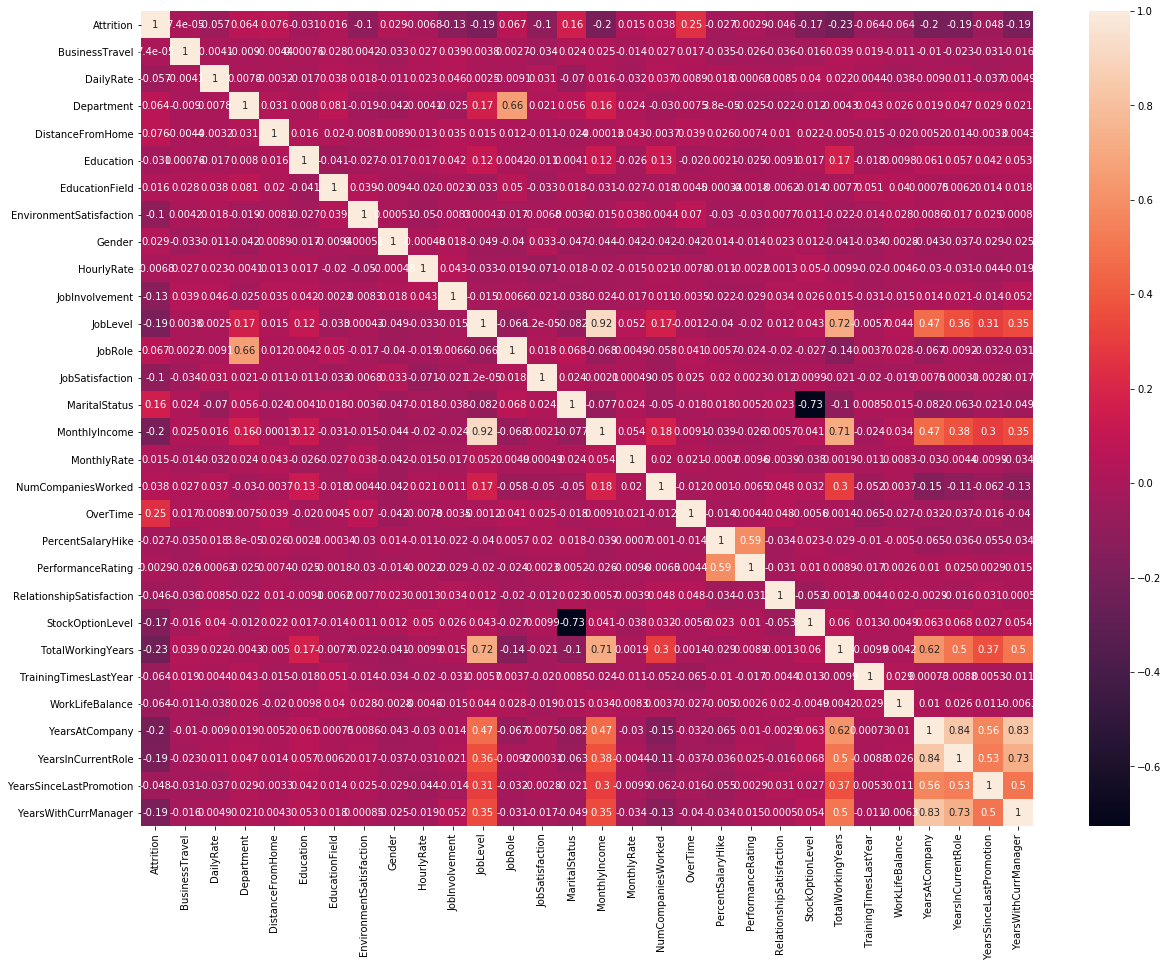

In [24]:
plt.subplots(figsize=(20,15))
sb.heatmap(data_final.corr(),annot=True)

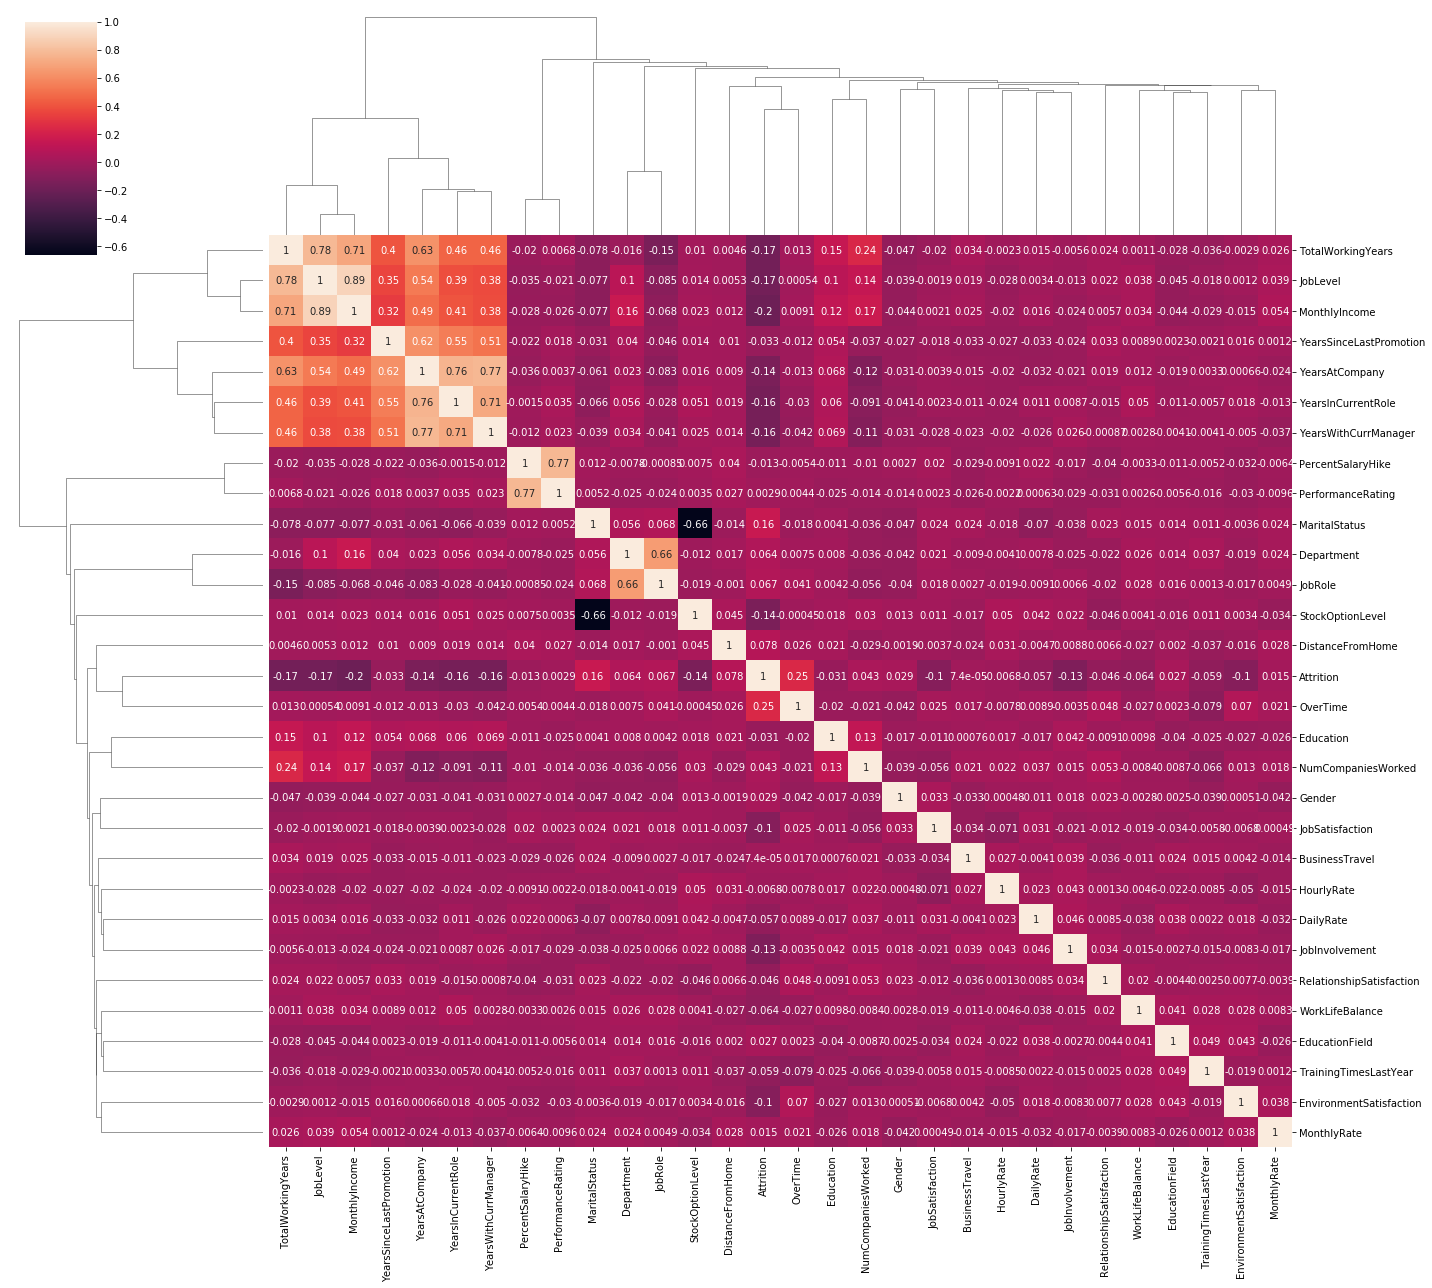

In [25]:
# clustermap of co-related data

sb.clustermap(df.corr(),annot=True,figsize=(20,18))

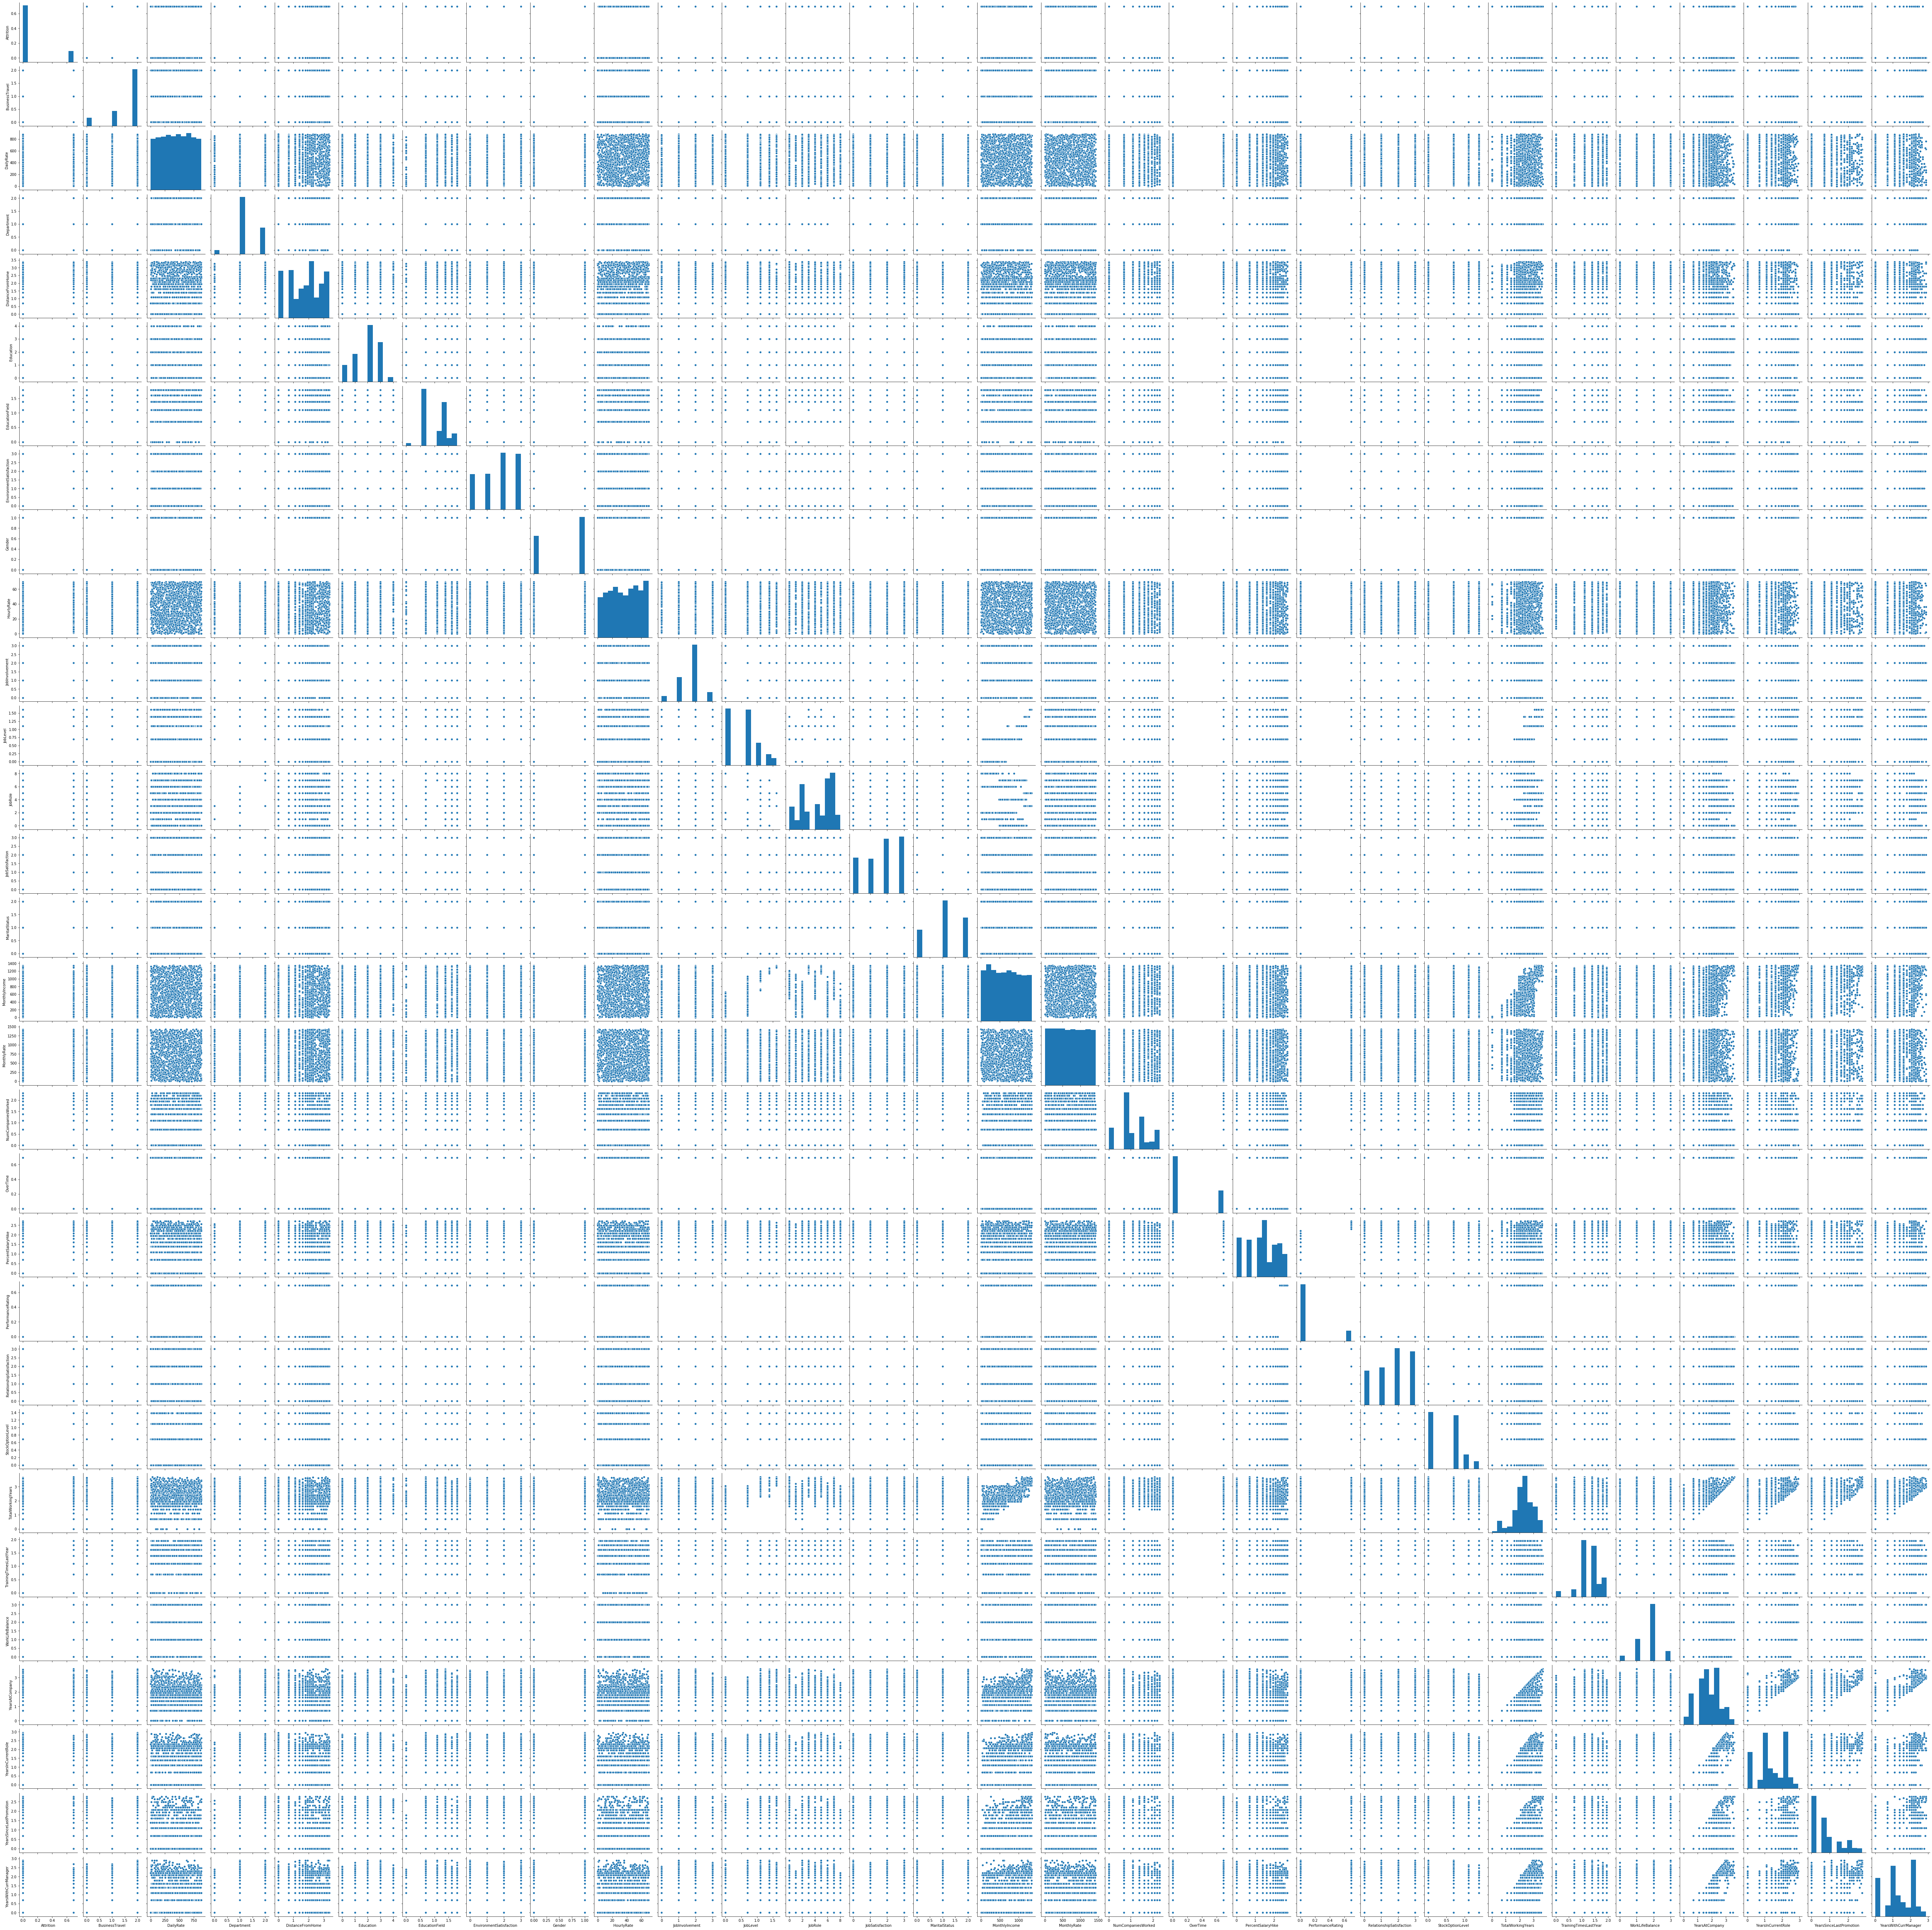

In [26]:
# paiwise plot of relationship with the dataset

sb.pairplot(data_final)

# Model building

Considering complete data_final as x except PerformanceRating

Considering only PerformanceRating as y 

In [27]:
x=data_final.drop(['PerformanceRating'],axis=1)
y=data_final['PerformanceRating']

In [28]:
#training and testting the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=50)

In [29]:
# working on RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)

In [30]:
#Finding mean_absolute_error,mean_squared_error, root_mean_square on RandomForestRegressor

print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))
print()
#cross validation
score=cross_val_score(rfr,x,y,cv=5)
print('score mean :',score.mean())
print('score std :',score.std())
print()
#cross prediction
predscore=cross_val_predict(rfr,x,y,cv=5)
print(predscore)

MAE : 2.235530601215329e-16
MSE : 3.22651880944039e-31
RMSE : 5.680245425543152e-16

score mean : 1.0
score std : 0.0

[0.         0.69314718 0.         ... 0.69314718 0.         0.        ]


Here we have the result of RandomForestRegressor model we will try 2 more model 

In [41]:
#working on DecisionTreeRegressor 

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

In [42]:
#Finding mean_absolute_error,mean_squared_error, root_mean_square on RandomForestRegressor

print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))
print()
#cross valiation 
score=cross_val_score(dtr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(dtr,x,y,cv=5)
print(predscore)

MAE : 1.7196389240117915e-16
MSE : 1.9091827274795208e-31
RMSE : 4.3694195581101168e-16

mean score : 1.0
STD score: 0.0

[0.         0.69314718 0.         ... 0.69314718 0.         0.        ]


Here we have the result of DecisionTreeRegressor model here rmse is bit low compared to rfr model

In [43]:
# working on SVR 

svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)

In [34]:
#Finding mean_absolute_error,mean_squared_error, root_mean_square on RandomForestRegressor

print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))
print()
#cross valiadtion
score=cross_val_score(svr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(svr,x,y,cv=5)
print(predscore)

MAE : 0.17629977878471753
MSE : 0.06290287701369977
RMSE : 0.25080445971652854

mean score : -0.005197528614706459
STD score: 0.005546407405705899

[0.09959989 0.10046752 0.0999839  ... 0.10033554 0.09991663 0.09978861]


In [35]:
#working on GridSearchCV 
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8]
}
gs = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
gs.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [36]:
gs.best_params_

{'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}

In [37]:
gs.best_score_

1.0

In [38]:
#saving the model using joblib and pickle
joblib.dump(svr,'hr.pkl')

['hr.pkl']